<a href="https://colab.research.google.com/github/yarusx/cat-vs-dogo/blob/main/dog_cat_breed_0_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras.preprocessing.image as image
import zipfile
from google.colab import files

In [7]:
#UNZIPPING PRETRAINED MODELS AND CREATING MODELS VARIABLES
!wget -q --no-check-certificate \
    https://github.com/yarusx/cat-vs-dogo/blob/main/models/dvc.zip?raw=true \
    -O /tmp/dvc.zip
!wget -q --no-check-certificate \
    https://github.com/yarusx/cat-vs-dogo/blob/main/models/dogs_breeds.zip?raw=true \
    -O /tmp/dogs_breeds.zip
!wget -q --no-check-certificate \
    https://github.com/yarusx/cat-vs-dogo/blob/main/models/cats_breeds.zip?raw=true \
    -O /tmp/cats_breeds.zip

local_zip = '/tmp/dvc.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/dvc')
local_zip = '/tmp/dogs_breeds.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/dogs')
local_zip = '/tmp/cats_breeds.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/cats')

dvc_model = tf.keras.models.load_model('/tmp/dvc/content/saved_model/dvc') 
dogs_model = tf.keras.models.load_model('/tmp/dogs/saved_model/dogs') 
cats_model = tf.keras.models.load_model('/tmp/cats/saved_model/cats') 

In [8]:
# LISTS OF DOGS AND CATS BREEDS
d_breeds = ['pug', 'basset_hound', 'shiba_inu', 'leonberger', 'saint_bernard', 'miniature_pinscher', 'wheaten_terrier', 'scottish_terrier', 'pomeranian', 'german_shorthaired', 'english_setter', 'newfoundland', 'boxer', 'great_pyrenees', 'samoyed', 'japanese_chin', 'english_cocker_spaniel', 'havanese', 'american_pit_bull_terrier', 'keeshond', 'american_bulldog', 'chihuahua', 'beagle', 'yorkshire_terrier', 'staffordshire_bull_terrier']
c_breeds = ['egyptian_mau', 'siamese', 'birman', 'abyssinian', 'sphynx', 'british_shorthair', 'bombay', 'russian_blue', 'persian', 'ragdoll', 'maine_coon', 'bengal']

In [9]:
def breed_id(dog=True, model=None, x=None):
    breed = model.predict(x)
    breed = tf.nn.softmax(breed)
    breed = np.argmax(breed, axis=1)
    plt.figure()
    plt.imshow(x[0]/255)
    if dog==True:
        plt.title('Breed name: ' + d_breeds[int(breed)])
    else:
        plt.title('Breed name: ' + c_breeds[int(breed)])

Saving bed-1284238_1280.jpg to bed-1284238_1280 (1).jpg
bed-1284238_1280.jpg is a dog


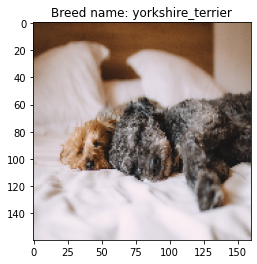

In [13]:
#UPLOAD YOUR PICTURES TO PREDICT DOG OR CAT AND ITS BREED
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(160, 160))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = dvc_model.predict(images, batch_size=10)
  classes = tf.nn.sigmoid(classes)
  
  if classes[0]>0.5:
    print(fn + " is a dog")
    breed_id(dog=True, model=dogs_model, x=x)
  else:
    print(fn + " is a cat")
    breed_id(dog=False, model=cats_model, x=x)